# 🛒 ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido y se introdujeron valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.


## 🗂️ Diccionario de datos

Hay cinco tablas en el conjunto de datos, que se usaron para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# 🔍 Paso 1. Descripción de los datos

Leer los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verificar la información para cada DataFrame creado.


## 🧾 Plan de solución

Paso 1. Descripción de los datos.

1. Importar las librerias
2. Cargar los datasets

In [73]:
# importar librerías
import pandas as pd              # Manipulación de datos
import numpy as np               # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficos

In [74]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv("C:/Users/APC/Documents/tripleten/Sprint 4/datasets/instacart_orders.csv", sep= ";")
df_products = pd.read_csv("C:/Users/APC/Documents/tripleten/Sprint 4/datasets/products.csv", sep= ";")
df_aisles = pd.read_csv("C:/Users/APC/Documents/tripleten/Sprint 4/datasets/aisles.csv",sep= ";")
df_departments = pd.read_csv("C:/Users/APC/Documents/tripleten/Sprint 4/datasets/departments.csv",sep= ";")
df_order = pd.read_csv("C:/Users/APC/Documents/tripleten/Sprint 4/datasets/order_products.csv",sep= ";")

In [75]:
# mostrar información del DataFrame
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [76]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [77]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [78]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [79]:
# mostrar información del DataFrame
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## 📌 Conclusiones

Paso 1. Descripción de los datos.

Los archivos no fueron leídos correctamente como CSV delimitado por comas, sino como un solo string, esto indica que el separador usado en el archivo es punto y coma, y no coma que es el valor predeterminado, por lo que se debio usar el argumento sep=';' para corregir el error.


# 🧹 Paso 2. Preprocesamiento de los datos

Se preprocesaron los datos de la siguiente manera:

- Se verifica y corrige los tipos de datos (por ejemplo, se asegúra que las columnas de ID sean números enteros).
- Se identifica y completa los valores ausentes.
- Se identifica y elimina los valores duplicados.

## 🧾 Plan de solución

Paso 2. Preprocesamiento de los datos.

1. Se usa el metodo duplicated() para identificar filas duplicadas
2. Se Muestran las filas duplicadas con len()

## 🧹 Encontrar y eliminar los valores duplicados.

### `orders` data frame

In [80]:
# Revisa si hay pedidos duplicados

# Verificar si hay filas completamente duplicadas
filas_duplicadas = df_instacart[df_instacart.duplicated()]

# Mostrar el número total de duplicados
num_duplicados = len(filas_duplicadas)

# Mostrar primeras filas duplicadas  
print("Número total de filas duplicadas:",num_duplicados)
filas_duplicadas.head()

Número total de filas duplicadas: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0


Se repiten 15 filas, que tienen en comun que se repiten los mismos datos en todas las columnas

In [81]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Filtrar pedidos del miércoles (día 3) a las 2:00 a.m.
orders_miercoles = df_instacart[(df_instacart["order_dow"] == 3) & (df_instacart["order_hour_of_day"] == 2)]

# Mostrar el número total de pedidos
print("Número de pedidos realizados el miércoles a las 2:00 a.m.:", len(orders_miercoles))

Número de pedidos realizados el miércoles a las 2:00 a.m.: 121


¿Qué sugiere este resultado?

Podria deberse a habitos de compra nocturnos o a un error en la captura de los datos de hora

In [82]:
# Elimina los pedidos duplicados
df_instacart = df_instacart.drop_duplicates()

In [83]:
# Vuelve a verificar si hay filas duplicadas
filas_duplicadas = df_instacart[df_instacart.duplicated()]

# sumar filas duplicadas quedan
sum_duplicados = filas_duplicadas.sum()
print("Número de filas duplicadas:", sum_duplicados)

Número de filas duplicadas: order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


In [84]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
id_duplicados = df_instacart[df_instacart.duplicated("order_id", keep=False)]

# Mostrar resultados
print(f"Número total de order_id duplicados: {len(id_duplicados)}")
if len(id_duplicados) > 0:
    print("\nPedidos duplicados por order_id:")
    print(id_duplicados.sort_values(by="order_id").to_string(index=False))
else:
    print("No se encontraron order_id duplicados.")

Número total de order_id duplicados: 0
No se encontraron order_id duplicados.


### 📌 Descripcion breve de hallazgos

Se encontraron 15 filas duplicadas, se eliminaron los duplicados y se verifico nuevamente que no hubieran mas filas con duplicados, tambien se encontro que exixten 121 pedidos realizados los dias miercoles a las 2 am.

### `products` data frame

In [85]:
# Verifica si hay filas totalmente duplicadas

filas_duplicadas = df_products[df_products.duplicated()]

# Mostrar el número total de duplicados
num_duplicados = len(filas_duplicadas)

# Mostrar primeras filas duplicadas  
print("Número total de filas duplicadas:",num_duplicados)
filas_duplicadas.head()


Número total de filas duplicadas: 0


,product_id,product_name,aisle_id,department_id


In [86]:
# Revisa únicamente si hay ID de productos duplicados

duplicated_id = df_products[df_products.duplicated(subset='product_id', keep=False)]
print("Número de ID de producto duplicados:", duplicated_id['product_id'].nunique())
print(duplicated_id)

Número de ID de producto duplicados: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [87]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

# Convertir los nombres de producto a mayúsculas
df_products["product_name_upper"] = df_products["product_name"].str.upper()

# Verificar si hay nombres duplicados en mayúsculas
duplicated_names = df_products[df_products["product_name_upper"].duplicated(keep=False)]

# Mostrar resultados
total_duplicates = len(duplicated_names)

if total_duplicates > 0:
    print(f"Número total de nombres de productos duplicados encontrados: {total_duplicates}")
else:
    print("No se encontraron nombres duplicados de productos.")

Número total de nombres de productos duplicados encontrados: 1465


In [88]:
# Revisa si hay nombres duplicados de productos no faltantes

# Eliminar filas con product_name vacío
df_products = df_products[df_products["product_name"].notna() & (df_products["product_name"] != "")]

# Convertir a mayúsculas para hacer comparacion
df_products["product_name_upper"] = df_products["product_name"].str.upper()

# Buscar duplicados en nombres de producto
duplicated_names = df_products[df_products["product_name_upper"].duplicated(keep=False)]

total_duplicates = len(duplicated_names)

if total_duplicates > 0:
    print(f"Número total de nombres de productos duplicados no faltantes: {total_duplicates}")
else:
    print("No se encontraron nombres de productos duplicados.")

Número total de nombres de productos duplicados no faltantes: 207


### 📌 Descripcion breve de hallazgos.

1. No se encontraron filas duplicadas
2. Se encontraron 207 nombres de productos duplicados, misma cantidad de productos duplicados no faltantes

### `departments` data frame

In [89]:
# Revisa si hay filas totalmente duplicadas
filas_duplicadas = df_departments[df_departments.duplicated()]

# Mostrar el número total de duplicados
num_duplicados = len(filas_duplicadas)

# Mostrar primeras filas duplicadas  
print("Número total de filas duplicadas:",num_duplicados)
filas_duplicadas.head()

Número total de filas duplicadas: 0


,department_id,department


In [90]:
# Revisa únicamente si hay IDs duplicadas de departamentos

id_duplicado= df_departments[df_departments.duplicated(subset='department_id', keep=False)]
print("Número de ID de producto duplicados:", id_duplicado['department_id'].nunique())
print(id_duplicado)

Número de ID de producto duplicados: 0
Empty DataFrame
Columns: [department_id, department]
Index: []


### 📌 Descripcion breve de hallazgos.

No se encontraron filas duplicadas, tampoco en la columna department_id hay duplicados

### `aisles` data frame

In [91]:
# Revisa si hay filas totalmente duplicadas

filas_duplicadas = df_aisles[df_aisles.duplicated()]

# Mostrar el número total de duplicados
num_duplicados = len(filas_duplicadas)

# Mostrar primeras filas duplicadas  
print("Número total de filas duplicadas:",num_duplicados)
filas_duplicadas.head()

Número total de filas duplicadas: 0


,aisle_id,aisle


In [92]:
# Revisa únicamente si hay IDs duplicadas de pasillos

id_duplicado= df_aisles[df_aisles.duplicated(subset='aisle_id', keep=False)]
print("Número de ID de producto duplicados:", id_duplicado['aisle_id'].nunique())
print(id_duplicado)

Número de ID de producto duplicados: 0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


### 📌 Descripcion breve de hallazgos.

No se encontro filas duplicadas, tampoco valores en aisle_id duplicados

### `order_products` data frame

In [93]:
# Revisa si hay filas totalmente duplicadas
filas_duplicadas = df_order[df_order.duplicated()]

# Mostrar el número total de duplicados
num_duplicados = len(filas_duplicadas)

# Mostrar primeras filas duplicadas  
print("Número total de filas duplicadas:",num_duplicados)
filas_duplicadas.head()

Número total de filas duplicadas: 0


,order_id,product_id,add_to_cart_order,reordered


In [94]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Verificar duplicados en la combinación de columnas clave
duplicados_engañosos = df_order[df_order.duplicated(subset=['order_id', 'product_id'], keep=False)]

# Mostrar el número de duplicados y las primeras filas
print(f"Número de duplicados engañosos en ('order_id', 'product_id'): {duplicados_engañosos.shape[0]}")
duplicados_engañosos.head()

Número de duplicados engañosos en ('order_id', 'product_id'): 0


,order_id,product_id,add_to_cart_order,reordered


### 📌 Descripcion breve de hallazgos.

No se encontraron duplicados engañosos

## 🧹 Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [95]:
# Encuentra los valores ausentes en la columna 'product_name'

valores_ausentes = df_products['product_name'].isna().sum()
print(f"Número de valores ausentes en 'product_name': {valores_ausentes}")

Número de valores ausentes en 'product_name': 0


### 📌 Descripcion breve de hallazgos.

Se encontraron 1258 valores ausentes en la columna product_name

In [96]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

# Filtrar las filas donde 'product_name' está ausente
valores_ausentes = df_products[df_products['product_name'].isna()]

# Verificar si todos los valores ausentes están en el pasillo con ID 100
pasillo_100 = (valores_ausentes['aisle_id'] == 100).all()

# Mostrar el resultado
print("¿Todos los productos con nombre ausente pertenecen al pasillo 100?:", pasillo_100)
print("Número total de filas con nombres ausentes:", valores_ausentes.shape[0])

# Mostrar las filas con nombre ausente
print(valores_ausentes)

¿Todos los productos con nombre ausente pertenecen al pasillo 100?: True
Número total de filas con nombres ausentes: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, product_name_upper]
Index: []


### 📌 Descripcion breve de hallazgos.

Los 1258 valores ausentes estan relacionados al ID 100

In [97]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

# Verificar si todos los productos con nombre ausente tienen department_id igual a 21
id_21 = (valores_ausentes['department_id'] == 21).all()

# Mostrar el resultado
print("¿Todos los productos con nombre ausente pertenecen al departamento 21?:", id_21)

¿Todos los productos con nombre ausente pertenecen al departamento 21?: True


### 📌 Descripcion breve de hallazgos.

Efectivamente todos los productos con nombre ausente pertenecen al departamento 21

In [98]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# Buscar el pasillo con ID 100
pasillo_100 = df_aisles[df_aisles['aisle_id'] == 100]

# Buscar el departamento con ID 21
departamento_21 = df_departments[df_departments['department_id'] == 21]

# Mostrar ambos
print("Pasillo con ID 100:")
print(pasillo_100)

print("\nDepartamento con ID 21:")
print(departamento_21)

Pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Departamento con ID 21:
    department_id department
20             21    missing


### 📌 Descripcion breve de hallazgos.

1258 productos tienen valores ausentes en la columna 'product_name'.
Todos estos productos están relacionados con: aisle_id = 100, cuyo nombre es "missing" y department_id = 21, cuyo nombre también es "missing".

In [99]:
# Completa los nombres de productos ausentes con 'Unknown'

# Completar los valores ausentes en 'product_name' con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

# Verificar que ya no haya valores faltantes
print("Valores ausentes en 'product_name' después de asignar 'Unknown':", df_products['product_name'].isna().sum())

Valores ausentes en 'product_name' después de asignar 'Unknown': 0


### 📌 Descripcion breve de hallazgos.

Se remplazaron los valores ausentes con 'Unknown' y se verifico nuevamente si existian valores ausentes 

### `orders` data frame

In [100]:
# Encuentra los valores ausentes

# Verificar valores ausentes
valores_ausentes = df_instacart.isna().sum()

# Mostrar solo las columnas con valores faltantes
print(valores_ausentes [valores_ausentes  > 0])


days_since_prior_order    28817
dtype: int64


In [101]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Filtrar las filas donde days_since_prior_order está ausente
faltantes = df_instacart[df_instacart['days_since_prior_order'].isna()]

# Verificar si alguno no es el primer pedido
no_es_primer_pedido = faltantes[faltantes['order_number'] != 1]

# Mostrar la cantidad y las primeras filas si las hubiera
print(no_es_primer_pedido.shape[0])
print(no_es_primer_pedido.head())


0
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### 📌 Descripcion breve de hallazgos.

Todos los valores ausentes en la columna 'days_since_prior_order' corresponden al primer pedido de cada cliente

### `order_products` data frame

In [102]:
# Encuentra los valores ausentes

# Verificar valores ausentes
valores_ausentes = df_order.isna().sum()

# Mostrar solo las columnas con valores faltantes
print(valores_ausentes [valores_ausentes  > 0])
print(valores_ausentes)

add_to_cart_order    836
dtype: int64
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [103]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

min_value = df_order['add_to_cart_order'].min()
max_value = df_order['add_to_cart_order'].max()

print("El valor minimo es:",min_value)
print("El valor maximo es:",max_value)

El valor minimo es: 1.0
El valor maximo es: 64.0


### 📌 Descripcion breve de hallazgos.

Se encontro que el pedido minimo fue de una unidad y el maximo de 64 unds

In [104]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# Filtrar las filas donde 'add_to_cart_order' es NaN
valor_ausente = df_order[df_order['add_to_cart_order'].isna()]

# Mostrar los IDs de pedidos únicos con valores ausentes
pedidos_unicos = valor_ausente['order_id'].unique()

print("Pedidos con 'add_to_cart_order' ausente:")
print(pedidos_unicos)

Pedidos con 'add_to_cart_order' ausente:
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [143]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Contar cuántos productos tiene cada pedido (con valores ausentes)
product_counts = df_order[df_order['order_id'].isin(valor_ausente)].groupby('order_id').size()

# Verificar si todos tienen más de 64 productos
mas_64 = (product_counts > 64).all()

print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?:", mas_64)

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# Agrupar por 'order_id' y contar cuántos productos tiene cada pedido con datos ausentes
group_order = valor_ausente.groupby('order_id').size().reset_index(name='num_productos')

print(group_order)

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_order[df_order['order_id'].isin(pedidos_unicos)].groupby('order_id')['product_id'].count().min()

# Contar cuántos 'product_id' hay en cada 'order_id'
conteo_productos_por_pedido = df_order.groupby('order_id')['product_id'].count()

# Obtener el valor mínimo del conteo
min_productos_por_pedido = conteo_productos_por_pedido.min()

print("Valor mínimo de productos por pedido:", min_productos_por_pedido)

¿Todos los pedidos con valores ausentes tienen más de 64 productos?: True
    order_id  num_productos
0       9310              1
1      61355             63
2     102236             31
3     129627              5
4     165801              6
..       ...            ...
65   2999801              6
66   3125735             22
67   3308010             51
68   3347453              7
69   3383594              5

[70 rows x 2 columns]
Valor mínimo de productos por pedido: 1


### 📌 Descripcion breve de hallazgos.

1. Se encontraron 836 valores ausentes en la columna add_to_cart_order
2. El valor minimo fue: 1 y el valor maximo es 64
3. En total 70 pedidos con valores ausentes

In [107]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

# Reemplazar valores ausentes con 999
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].fillna(999)

# Convertir la columna a tipo entero
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].astype(int)

# Verificación del tipo de dato
print(df_order['add_to_cart_order'].dtypes)

int64


### 📌 Descripcion breve de hallazgos.

1. Los valores ausentes se reemplazaron por 999 para conservar las filas sin perder datos.
2. La columna fue convertida al tipo de dato entero, lo cual es apropiado para representar posiciones en un carrito.

## 🧠 Conclusiones

Conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

- Se encontraron 15 filas duplicadas, se eliminaron los duplicados y se verifico nuevamente que no hubieran mas filas con duplicados, tambien se encontro que exixten 121 pedidos realizados los dias miercoles a las 2 am.

- Se encontraron 207 nombres de productos duplicados, misma cantidad de productos duplicados no faltantes

- Se encontraron 1258 valores ausentes en la columna product_name, estos 1258 valores ausentes estan relacionados al ID 100
Todos los productos con nombre ausente pertenecen al departamento 21

- 1258 productos que tienen valores ausentes en la columna 'product_name' están relacionados con: aisle_id = 100, cuyo nombre es "missing" y department_id = 21

- Se remplazaron los valores ausentes con 'Unknown' y se verifico nuevamente que no existieranan valores ausentes

- Todos los valores ausentes en la columna 'days_since_prior_order' corresponden al primer pedido de cada cliente

- Se encontro que el pedido minimo fue de una unidad y el maximo de 64 unds

- Se encontraron 836 valores ausentes en la columna add_to_cart_order, en total 70 pedidos con valores ausentes, Los valores ausentes se reemplazaron por 999 para conservar las filas sin perder datos.

# 📊 Paso 3. Análisis de los datos

# Parte [A]

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verificar que los valores sean sensibles

In [108]:
#Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables 
#(es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6)

# Verificar los valores únicos en 'order_hour_of_day' y 'order_dow'
horas_unicas = df_instacart['order_hour_of_day'].unique()
dias_unicos = df_instacart['order_dow'].unique()

# Mostrar el rango mínimo y máximo de cada columna
print("Valores únicos en 'order_hour_of_day':", sorted(horas_unicas))
print("Valores únicos en 'order_dow':", sorted(dias_unicos))
print()
print("Rango de horas:", df_instacart['order_hour_of_day'].min(), "a", df_instacart['order_hour_of_day'].max())
print("Rango de días:", df_instacart['order_dow'].min(), "a", df_instacart['order_dow'].max())

Valores únicos en 'order_hour_of_day': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23)]
Valores únicos en 'order_dow': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Rango de horas: 0 a 23
Rango de días: 0 a 6


### 📌 Descripcion breve de hallazgos.

1. Todos los valores en las columnas order_hour_of_day y order_dow son razonables.
2. 'order_hour_of_day' está dentro del rango de 0 a 23
3. 'order_dow' está dentro del rango de 0 a 6
4. No se encontraron valores fuera de esos rangos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

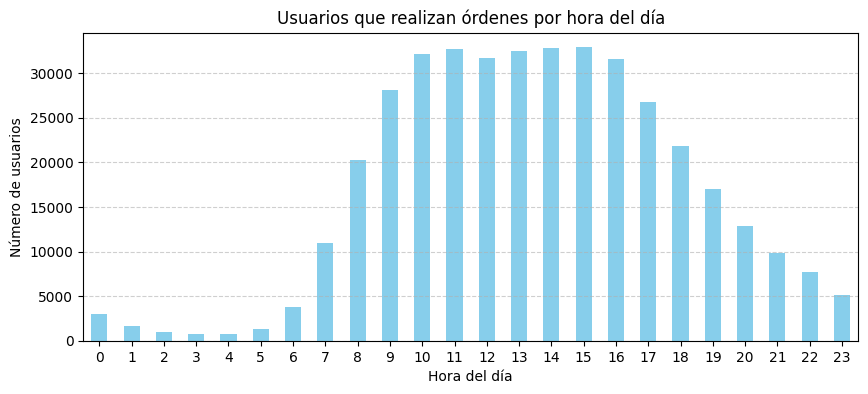

In [109]:
# Agrupar por hora y contar usuarios únicos (user_id)
usuarios_por_hora = df_instacart.groupby('order_hour_of_day')['user_id'].nunique()

# Crear gráfico
plt.figure(figsize=(10, 4))
usuarios_por_hora.plot(kind='bar', color='skyblue')

# Personalizar gráfico
plt.title("Usuarios que realizan órdenes por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de usuarios")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()

### 📌 Descripcion breve de hallazgos.

Entre las 10:00am y las 4:00pm mas de 3000 usuarios realizan ordenes.  

### [A3] ¿Qué día de la semana compran víveres las personas?

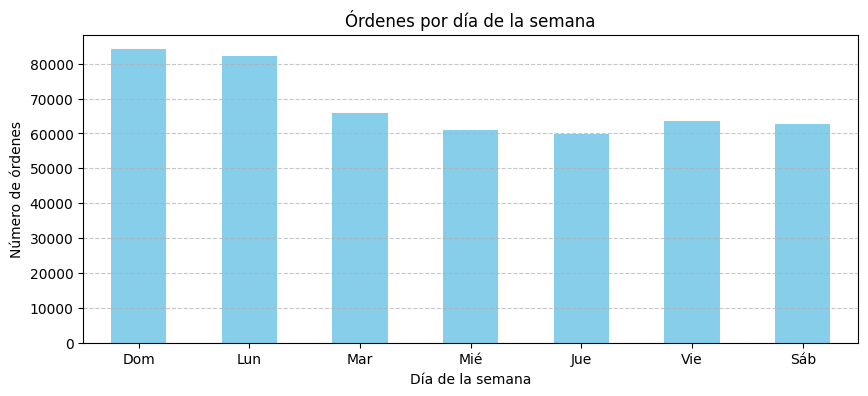

In [110]:
# Contar cuántas órdenes se hacen cada día (0=domingo, 6=sábado)
ordenes_por_dia = df_instacart['order_dow'].value_counts().sort_index()

# Días de la semana empezando en domingo
dias_semana = ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']

# Crear el gráfico
plt.figure(figsize=(10, 4))
ordenes_por_dia.plot(kind='bar', color='skyblue')
plt.title("Órdenes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de órdenes")
plt.xticks(ticks=range(7), labels=dias_semana, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

### 📌 Descripcion breve de hallazgos.

Todos los dias las personas compran viveres, sin embargo los dias Domingo y Lunes son los dias en que mas compras realizan 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comentar sobre los valores mínimos y máximos.

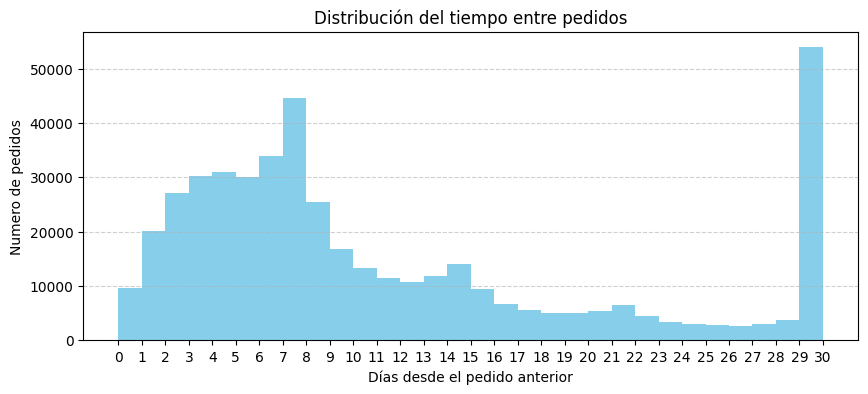

Valor mínimo: 0.0 días
Valor máximo: 30.0 días


In [111]:
# Graficar la distribución del tiempo entre pedidos
plt.figure(figsize=(10, 4))
df_instacart['days_since_prior_order'].dropna().plot(kind='hist', bins=30, color='skyblue')

# Personalizar gráfico
plt.title("Distribución del tiempo entre pedidos")
plt.xlabel("Días desde el pedido anterior")
plt.ylabel("Numero de pedidos")
plt.xticks(ticks=range(0, 31))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()

# Calcular y mostrar valores mínimos y máximos
minimo = df_instacart['days_since_prior_order'].min()
maximo = df_instacart['days_since_prior_order'].max()
print(f"Valor mínimo: {minimo} días\nValor máximo: {maximo} días")

### 📌 Descripcion breve de hallazgos.

1. Hay dias en que se realizan pedidos el mismo dia y la frecuencia maxima son 30 dias.
2. los 15 primeros dias se realizan 1000 pedidos o mas.

# Parte [B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Trazar gráficos de barra para los dos días y describir las diferencias.

In [112]:
# Filtrar por miércoles (order_dow == 3) y sábado (order_dow == 6)
orders_mie = df_instacart[df_instacart['order_dow'] == 3]
orders_sab = df_instacart[df_instacart['order_dow'] == 6]

In [113]:
# Contar pedidos por hora del día
horas_mie = orders_mie['order_hour_of_day'].value_counts().sort_index()
horas_sab = orders_sab['order_hour_of_day'].value_counts().sort_index()

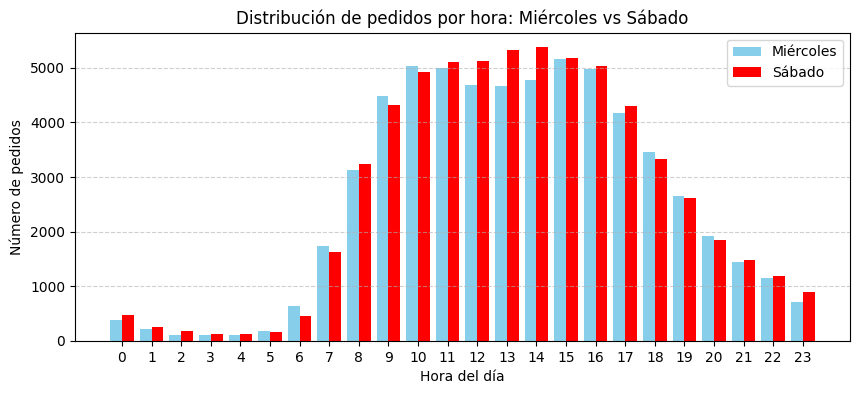

In [114]:
# Crear gráfico comparativo
plt.figure(figsize=(10, 4))
plt.bar(horas_mie.index - 0.2, horas_mie.values, width=0.4, label='Miércoles', color='skyblue')
plt.bar(horas_sab.index + 0.2, horas_sab.values, width=0.4, label='Sábado', color='red')

# Personalizar el gráfico
plt.title("Distribución de pedidos por hora: Miércoles vs Sábado")
plt.xlabel("Hora del día")
plt.ylabel("Número de pedidos")
plt.xticks(range(0, 24))  # Mostrar todas las horas del día
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()

### 📌 Descripcion breve de hallazgos.

1. Los dos días tienen una curva muy similar, con un aumento desde las 7 a.m. y un pico entre las 10 a.m. y 4 p.m.
2. El Miércoles muestra ligeramente más pedidos en las primeras horas del día (6 a.m. – 10 a.m.).
3. El Sábado tiene mas pedidos entre las 11 a.m. y las 5 p.m.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [115]:
# Contar cuántos pedidos hizo cada cliente
pedidos_por_cliente = df_instacart.groupby('user_id')['order_id'].count()

# Ahora contar cuántos clientes hicieron X cantidad de pedidos
distribucion_pedidos = pedidos_por_cliente.value_counts().sort_index()

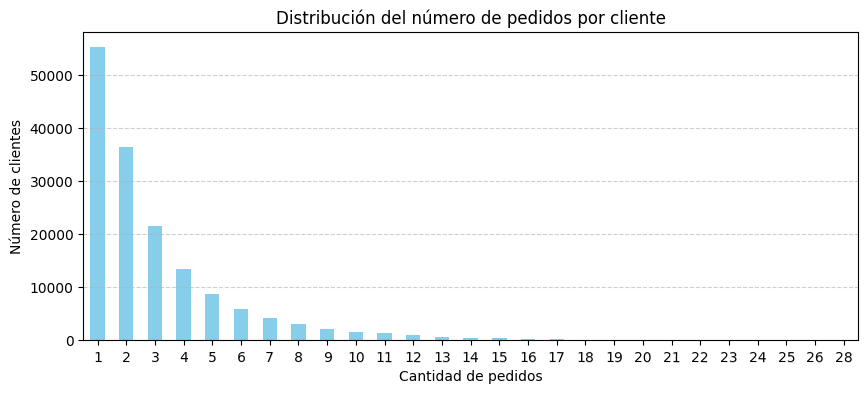

In [116]:
# Graficar
plt.figure(figsize=(10, 4))
distribucion_pedidos.plot(kind='bar', color='skyblue')

# Personalización
plt.title("Distribución del número de pedidos por cliente")
plt.xlabel("Cantidad de pedidos")
plt.ylabel("Número de clientes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=-1) 

plt.show()

### 📌 Descripcion breve de hallazgos.

1. Mas de 30000 clientes realizaron al menos 2 pedidos.
2. Mas de 20000 clientes realizaron al menos 3 pedidos.
3. Hay una caída progresiva conforme aumenta el número de pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestrar su ID y nombre)?

In [117]:
# Obtener los 20 productos más frecuentes por ID
top_product_id = df_order['product_id'].value_counts().head(20)

In [118]:
# Convertir a DataFrame para mantener orden
top_products_df = top_product_id.reset_index()
top_products_df.columns = ['product_id', 'order_count']

In [119]:
# Unir con nombres de productos
top_products_named = top_products_df.merge(
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='left')

print(top_products_named[['product_id', 'product_name']])

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


### 📌 Descripcion breve de hallazgos.

1. La Banana es el producto mas popular, seguido de Bag of Organic Bananas y Organic Strawberries para completar el top 3.

# Parte [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [120]:
# Unir ambos dataframes
df_merged = pd.merge(df_order, df_instacart[['order_id', 'user_id']], on='order_id')

# agrupar por user_id, order_id y contar product_id
items_por_pedido_usuario = df_merged.groupby(['user_id', 'order_id'])['product_id'].count().reset_index()

# Estadisticas basicas de artículos por usuario
print(items_por_pedido_usuario["product_id"].describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


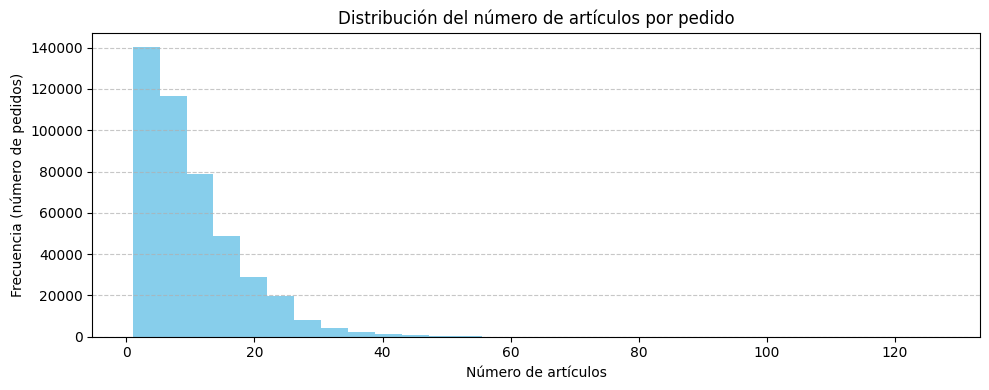

In [121]:
# Graficar histograma
plt.figure(figsize=(10, 4))
plt.hist(items_por_pedido_usuario["product_id"], bins=30, color='skyblue')
plt.title("Distribución del número de artículos por pedido")
plt.xlabel("Número de artículos")
plt.ylabel("Frecuencia (número de pedidos)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 📌 Descripcion breve de hallazgos.

1. En promedio las personas compran 10 articulos por pedido
2. Al rededor de 80.000 ordenes de pedidos, tienen 10 articulos 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestrar sus nombres e IDs de los productos)?

In [122]:
# Filtrar solo los productos reordenados
productos_reordenados = df_order[df_order['reordered'] == 1]

In [123]:
# Contar cuántas veces se ha reordenado cada producto
productos_reordenados_count = productos_reordenados.groupby('product_id').size().reset_index(name='reorder_count')

In [124]:
# Unir con la tabla de productos para obtener nombres de los productos
productos_reordenados_unir = pd.merge(productos_reordenados_count, df_products, on='product_id', how='inner')

In [125]:
# Ordenar por número de reordenes y seleccionar los 20 primeros
productos_reordenados_top = productos_reordenados_unir.sort_values(by='reorder_count', ascending=False).head(20)

In [126]:
# Mostrar resultados
print("Top 20 productos más reordenados:")
print(productos_reordenados_top[['product_id', 'product_name', 'reorder_count']])

Top 20 productos más reordenados:
       product_id              product_name  reorder_count
17837       24852                    Banana          55763
9383        13176    Bag of Organic Bananas          44450
15138       21137      Organic Strawberries          28639
15698       21903      Organic Baby Spinach          26233
33927       47209      Organic Hass Avocado          23629
34337       47766           Organic Avocado          18743
19995       27845        Organic Whole Milk          16251
34234       47626               Large Lemon          15044
20083       27966       Organic Raspberries          14748
12010       16797              Strawberries          13945
18811       26209                     Limes          13327
16450       22935      Organic Yellow Onion          11145
17919       24964            Organic Garlic          10411
32338       45007          Organic Zucchini          10076
35711       49683            Cucumber Kirby           9538
20247       28204     

### 📌 Descripcion breve de hallazgos.

1. Banana es el producto con mayor cantidad de reordenamientos, seguido de Bag of Organic Bananas y completando el top 3 Organic Strawberries.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [127]:
# Combinar df_order con df_products para tener información del producto
df_merged = pd.merge(df_order, df_products, on='product_id', how='left')

In [128]:
# Agrupar por producto y calcular repedidos
df_proporcion = df_merged.groupby(['product_id', 'product_name']).agg(total_pedidos=('order_id', 'count'), total_repedidos=('reordered', 'sum')
).reset_index()
#print(df_proporcion.head())

In [129]:
# Calcular la proporción de cada reorden
df_proporcion['proporcion_repedido'] = df_proporcion['total_repedidos'] / df_proporcion['total_pedidos']

In [130]:
# Visualizar resultados
df_proporcion.sort_values(by='total_pedidos', ascending=False).head()

,product_id,product_name,total_pedidos,total_repedidos,proporcion_repedido
22332,24852,Banana,66050,55763,0.844254
11772,13176,Bag of Organic Bananas,53297,44450,0.834006
18970,21137,Organic Strawberries,37039,28639,0.773212
19660,21903,Organic Baby Spinach,33971,26233,0.772217
42362,47209,Organic Hass Avocado,29773,23629,0.793639


### 📌 Descripcion breve de hallazgos.

1. Banana es el producto con mas pedidos sumando un total de 66.050, un total de repedidos de 55.763 que corresponde a un 84.4% en repedidos
2. Bag of Organic Bananas es el segundo produto mas pedido, totalizando 53.297, 44.450 en repedidos que corresponde al 83.4 % en repedidos
3. Organic Strawberries cierran el top 3 de productos mas pedidos consiguiendo un total 37.039,	28.639 en repedidos correspondientes al 77.3% en repedidos

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [131]:
# Combinar órdenes con productos por cliente, df_instacart con df_order
df_cliente_producto = pd.merge(df_instacart[['order_id', 'user_id']], df_order[['order_id', 'product_id']], on="order_id",  how='inner')

In [132]:
# Identificar si un producto es nuevo o repetido por cliente

# Contar cuántas veces ha aparecido cada (cliente, producto)
df_cliente_producto['vez_pedido'] = df_cliente_producto.groupby(['user_id', 'product_id']).cumcount() + 1
#df_cliente_producto[['user_id', 'product_id', 'vez_pedido']].head()

In [133]:
# Agrupar por cliente para calcular métricas

# Para cada cliente, contar cuántos productos únicos ha pedido
total_productos_unicos = df_cliente_producto.groupby('user_id')['product_id'].nunique().reset_index()
total_productos_unicos.columns = ['user_id', 'total_productos']
#total_productos_unicos.sample(5)

In [134]:
# Contar cuántos productos han sido repetidos (vez_pedido > 1)
repetidos_por_cliente = df_cliente_producto[df_cliente_producto['vez_pedido'] > 1].groupby('user_id')['product_id'].nunique().reset_index()
repetidos_por_cliente.columns = ['user_id', 'productos_repetidos']
#repetidos_por_cliente.sample(10)

In [135]:
# Unir ambos resultados
df_proporcion_cliente = pd.merge(total_productos_unicos, repetidos_por_cliente, on='user_id', how='left').fillna(0)
#df_proporcion_cliente

In [136]:
# Calcular la proporción
df_proporcion_cliente['proporcion_repetidos'] = df_proporcion_cliente['productos_repetidos'] / df_proporcion_cliente['total_productos']
df_proporcion_cliente.sort_values(by='proporcion_repetidos', ascending=False).head()

,user_id,total_productos,productos_repetidos,proporcion_repetidos
10360,14221,2,2.0,1.0
148123,204120,2,2.0,1.0
16825,23146,2,2.0,1.0
42324,58515,1,1.0,1.0
69491,95854,1,1.0,1.0


### 📌 Descripcion breve de hallazgos.

Existen clientes que han repetidos sus productos en sus pedidos hasta el 100% de las veces

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [137]:
# Filtrar los productos que fueron agregados en primer lugar (add_to_cart_order == 1)
primer_producto_por_orden = df_order[df_order['add_to_cart_order'] == 1]

In [138]:
# Contar cuántas veces aparece cada producto como "primero"
conteo_primeros_productos = primer_producto_por_orden['product_id'].value_counts().reset_index()
conteo_primeros_productos.columns = ['product_id', 'veces_primero']

In [139]:
# Unir con nombres de productos
top_primeros_productos = pd.merge(conteo_primeros_productos, df_products, on='product_id', how='inner')

In [140]:
# Seleccionar los 20 principales
top_20_primeros = top_primeros_productos.sort_values(by='veces_primero', ascending=False).head(20)
top_20_primeros

,product_id,veces_primero,product_name,aisle_id,department_id,product_name_upper
0,24852,15562,Banana,24,4,BANANA
1,13176,11026,Bag of Organic Bananas,24,4,BAG OF ORGANIC BANANAS
2,27845,4363,Organic Whole Milk,84,16,ORGANIC WHOLE MILK
3,21137,3946,Organic Strawberries,24,4,ORGANIC STRAWBERRIES
4,47209,3390,Organic Hass Avocado,24,4,ORGANIC HASS AVOCADO
5,21903,3336,Organic Baby Spinach,123,4,ORGANIC BABY SPINACH
6,47766,3044,Organic Avocado,24,4,ORGANIC AVOCADO
7,19660,2336,Spring Water,115,7,SPRING WATER
8,16797,2308,Strawberries,24,4,STRAWBERRIES
9,27966,2024,Organic Raspberries,123,4,ORGANIC RASPBERRIES


### 📌 Descripcion breve de hallazgos.

De los 20 primeros productos que las personas ponen primero en sus carritos, el que mas veces se puso es la banana, con 15562 apariciones, el ultimo de este top 20 es Organic Yellow Onion con 1246 apariciones.

### 🧠 Conclusion general del proyecto:

1. Horario de compras : Las órdenes tienden a concentrarse entre las 10:00 y 16:00, con picos mas altos entre las 13:00 y 14:00 los dias sabados.
2. Tiempo entre pedidos : El promedio es de aproximadamente 9-10 días , con mínimos de 0 días (re-pedidos inmediatos) y máximos de hasta 30 días. Esto refleja hábitos regulares de compra.
3. Patrones de consumo por día (miércoles vs sábado): Los sábados tienen picos más altos y extendidos durante el día, mientras que los miércoles muestran menor volumen de compras. lo cual indica que probablemente realizan compras en dia no laboral.
4. Pedidos por cliente: La mayoría de clientes realiza entre 5 y 20 pedidos.
5. Re-pedidos frecuentes: Muchos productos son re-pedidos constantemente, especialmente la banana.
6. Primeros productos en el carrito: Los productos que suelen agregarse primero son similares a los más populares